# Linear Regression with Scikit-Learn

In [62]:
# Import required libraries
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

In [48]:
# Use sample data from iris
df_iris = pd.read_csv('../data/iris.csv')

In [49]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


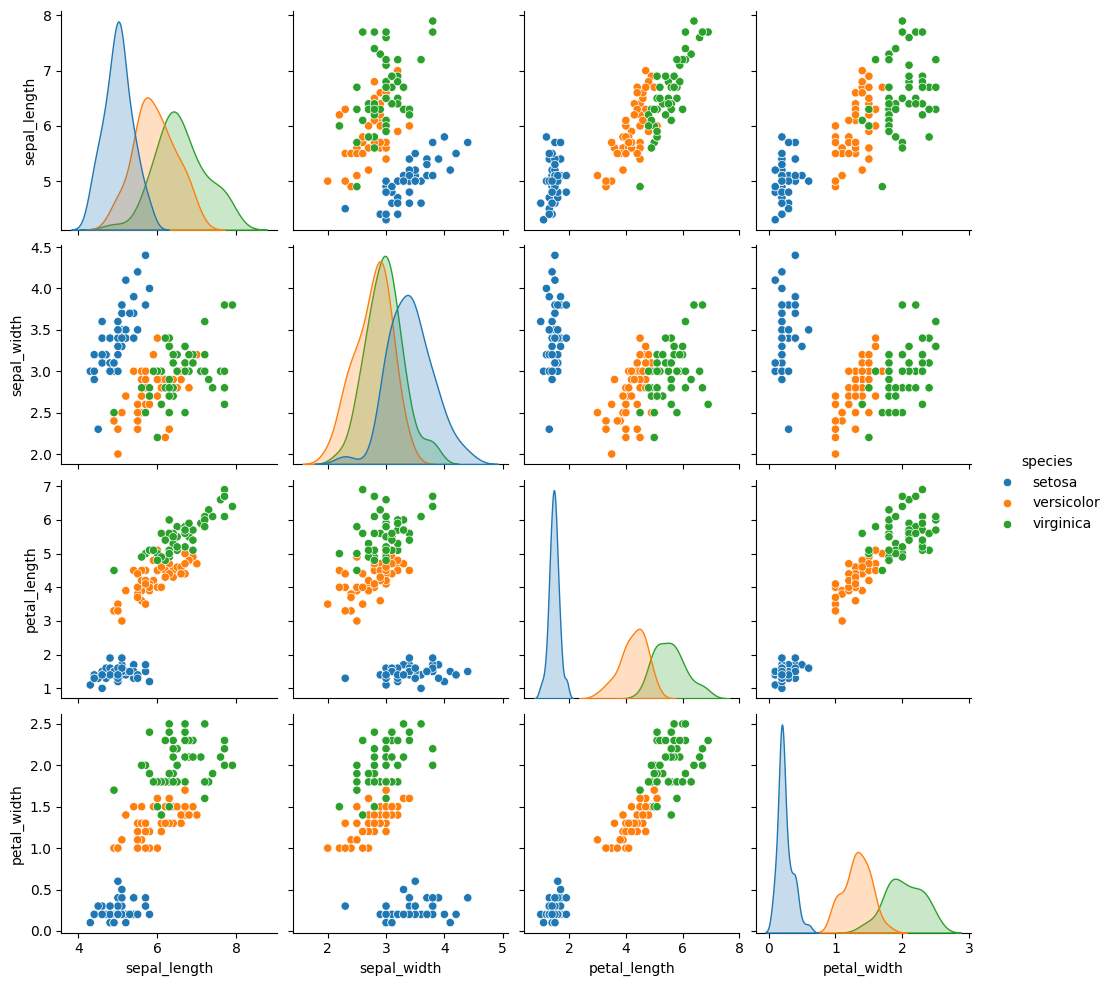

In [50]:
sns.pairplot(df_iris, hue="species")

In [52]:
def converter(specie):
    if specie == "setosa":
        return 0
    elif specie == "versicolor":
        return 1
    elif specie == "virginica":
        return 2
    else:
        return 3

In [53]:
df_iris['species'] = df_iris['species'].apply(converter)

In [54]:
display(df_iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Sample data using the Iris dataset.


In [56]:
X = df_iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df_iris['species']

Split the dataset into features and target variable

In [57]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Predict the sepal length (cm) of the iris flowers

Create and train the model

In [58]:
model = sk.linear_model.LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Prediction

In [ ]:
prediction = model.predict(X_test)

Model evaluation

In [63]:

print("Mean Absolute Error:", mean_absolute_error(y_test, prediction))
print("Mean Squared Error:", mean_squared_error(y_test, prediction))
print("Mean Root Squared Error:", np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 0.14669907762634185
Mean Squared Error: 0.03723364456197501
Mean Root Squared Error: 0.19296021497183044


In [64]:
df_iris.loc[6]

sepal_length    4.6
sepal_width     3.4
petal_length    1.4
petal_width     0.3
species         0.0
Name: 6, dtype: float64

In [65]:
dict_test_sample = {
    "sepal length (cm)": [4.6],
    "sepal width (cm)": [3.4],
    "petal length (cm)": [1.4],
    "petal width (cm)": [0.3],
    "species": 0,
}
test_df = pd.DataFrame(data=dict_test_sample)
test_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,4.6,3.4,1.4,0.3,0


In [72]:
prediction = model.predict(X_test)
print("Predicted:", int(prediction))
print("Actual Sepal Length (cm):", 4.6)

TypeError: only length-1 arrays can be converted to Python scalars